# 1. Setup  

Attention: Nodes of the graph must be labeled 0,...,|V|-1 for the code to work!

In [1]:
import networkx as nx
from scipy.stats import pearsonr

from curvatures import steinerbergerCurvature, lly_curvature

# 2. Comparison between curvatures

We compare the values of the Steinerberger curvature and the Lin-Lu-Yau curvature on different random graphs

In [6]:
def compare_edge_average(N,n,q, graph_type="ER"):
    """Compare the Steinerberger curvature to the Lin-Lu-Yau curvature by averaging the Steinerberger curvature of the two endpoints of an edge

    Args:
        N (int): Number of graphs
        n (int): Number of vertices in the Erdos-Renyi graph
        q (float): Probability for edge creation
        graph_type (str): Type of Random graph
    """
    pearson_correlation = []
    for _ in range(N):
        if graph_type == "ER":
            G=nx.erdos_renyi_graph(n=n, p=q)
        elif graph_type == "SBM": 
            G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
        else:
            raise TypeError("Graph type not supported")
        while not nx.is_connected(G):
            if graph_type == "ER":
                G=nx.erdos_renyi_graph(n=n, p=q)
            elif graph_type == "SBM": 
                G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
            else:
                raise TypeError("Graph type not supported")
            print("Disconnected Graph encountered")

        llyCurv = lly_curvature(G, double_edges=False)
        steinerbergerCurv = steinerbergerCurvature(G)
        avg_steinerberger_curv = []
        llyCurvList = []
        for edge in llyCurv.keys():
            average_steinerberger_curv = 0.5*(steinerbergerCurv[edge[0]] + steinerbergerCurv[edge[1]])
            avg_steinerberger_curv.append(average_steinerberger_curv)
            llyCurvList.append(llyCurv[edge])
                
       
        r, p = pearsonr(llyCurvList, avg_steinerberger_curv)
        
        pearson_correlation.append(r)
    return pearson_correlation

In [38]:
def compare_vertex_average(N,n,q, graph_type="ER"):
    """Compare the Steinerberger curvature to the Lin-Lu-Yau curvature by averaging the Lin-Lu-Yau curvature of all edges adjacent to a given vertex

    Args:
        N (int): Number of graphs
        n (int): NUmber of vertices in the Erdos-Renyi graph
        q (float): Probability of edge creation
    """
    pearson_correlation = []
    for _ in range(N):
        if graph_type == "ER":
            G=nx.erdos_renyi_graph(n=n, p=q)
        elif graph_type == "SBM": 
            G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
        else:
            raise TypeError("Graph type not supported")
        while not nx.is_connected(G):
            if graph_type == "ER":
                G=nx.erdos_renyi_graph(n=n, p=q)
            elif graph_type == "SBM": 
                G = nx.stochastic_block_model(sizes=[n,n,n], p=[[q, 0.1, 0.1], [0.1, q, 0.1], [0.1, 0.1, q]])
            else:
                raise TypeError("Graph type not supported")
            print("Disconnected Graph encountered")
            
        llyCurv = lly_curvature(G)
        steinerbergerCurv = steinerbergerCurvature(G)
        llyCurv_vertex = []
        if graph_type == "ER":
            for i in range(n):
                lly_curv_average = 0
                for j in range(n):
                    if G.has_edge(i,j):
                        lly_curv_average += llyCurv[(i,j)]
                lly_curv_average /= G.degree(i)
                llyCurv_vertex.append(lly_curv_average)
            r, p = pearsonr(llyCurv_vertex, steinerbergerCurv)   
            pearson_correlation.append(r)
        elif graph_type=="SBM": 
            for i in range(3*n):
                lly_curv_average = 0
                for j in range(n):
                    if G.has_edge(i,j):
                        lly_curv_average += llyCurv[(i,j)]
                lly_curv_average /= G.degree(i)
                llyCurv_vertex.append(lly_curv_average)
            r, p = pearsonr(llyCurv_vertex, steinerbergerCurv)   
            pearson_correlation.append(r)
    return pearson_correlation

## 2.1 Erdős–Rényi model

### 2.1.1 Averaging over endpoints of an edge

In [10]:
N, n, q = 10, 10, 0.5
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.0961405160797754),
 np.float64(0.17315514620955236),
 np.float64(0.0488344245503329),
 np.float64(-0.16606943343378802),
 np.float64(0.30710868040621797),
 np.float64(0.31328673211844527),
 np.float64(0.12386462801335442),
 np.float64(-0.16340392870328513),
 np.float64(-0.10978379694890622),
 np.float64(-0.13630521503692558)]

In [11]:
N, n, q = 10, 10, 0.6
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.31238464681067274),
 np.float64(-0.16234583291985016),
 np.float64(-0.1259218688538286),
 np.float64(-0.3033611322048959),
 np.float64(-0.34233389100292483),
 np.float64(-0.20451267368260784),
 np.float64(-0.07341261827611753),
 np.float64(-0.17893398195485433),
 np.float64(-0.435655367776988),
 np.float64(0.011868396294262226)]

In [12]:
N, n, q = 10, 10, 0.7
compare_edge_average(N=N,n=n, q=q)

[np.float64(0.03635650052582182),
 np.float64(0.17000465852905589),
 np.float64(-0.22434802847229915),
 np.float64(0.14114888202106843),
 np.float64(-0.1897783974471389),
 np.float64(0.08857835096084149),
 np.float64(-0.42057955139613434),
 np.float64(-0.03940633371707973),
 np.float64(0.02043686896903074),
 np.float64(0.09458100817351336)]

In [14]:
N, n, q = 10, 20, 0.5
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.08869375782812398),
 np.float64(0.052306580149232396),
 np.float64(-0.2444366026549634),
 np.float64(-0.06401926728974462),
 np.float64(0.13948871925981574),
 np.float64(-0.11144601605097766),
 np.float64(-0.12320195095064043),
 np.float64(-0.13056923523961098),
 np.float64(-0.008221281371715551),
 np.float64(-0.12358244823175193)]

In [15]:
N, n, q = 10, 20, 0.6
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.1179590189701793),
 np.float64(-0.10700634547571992),
 np.float64(-0.1345867211713824),
 np.float64(-0.005270786834314312),
 np.float64(-0.06275285947713832),
 np.float64(0.033919209147237776),
 np.float64(0.1208687273411697),
 np.float64(0.013865134373752653),
 np.float64(-0.12449176286348701),
 np.float64(-0.22253386093483687)]

In [16]:
N, n, q = 10, 20, 0.7
compare_edge_average(N=N,n=n, q=q)

[np.float64(-0.02952311323120703),
 np.float64(-0.18558494941611142),
 np.float64(-0.0004908273887768433),
 np.float64(-0.1372529275045696),
 np.float64(-0.11349943749829872),
 np.float64(-0.15489768880354848),
 np.float64(0.06626256912968015),
 np.float64(-0.07933860917303125),
 np.float64(-0.23955055563849964),
 np.float64(-0.2629659194152434)]

### 2.1.2 Averaging over adjacent edges

In [34]:
N, n, q = 10, 10, 0.5
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.68419054363783),
 np.float64(-0.5979994402554288),
 np.float64(-0.024722267814151294),
 np.float64(-0.1421373687154358),
 np.float64(0.1620491394785085),
 np.float64(-0.13805947919548087),
 np.float64(0.02279371417641357),
 np.float64(0.3632955390665231),
 np.float64(-0.003664429604573073),
 np.float64(-0.1580421879591278)]

In [18]:
N, n, q = 10, 10, 0.6
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.34968492735794654),
 np.float64(-0.06687178744613248),
 np.float64(0.2904035183150737),
 np.float64(-0.04212169065823812),
 np.float64(-0.6950284601243919),
 np.float64(0.025352619382124547),
 np.float64(-0.2050519699368405),
 np.float64(0.15547102654133152),
 np.float64(-0.2113500871330276),
 np.float64(0.46219961730087517)]

In [19]:
N, n, q = 10, 10, 0.7
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.43208451763618894),
 np.float64(-0.1777595476165686),
 np.float64(-0.2462607361189529),
 np.float64(-0.3196346658466588),
 np.float64(0.5809873093368887),
 np.float64(-0.08197695696822303),
 np.float64(-0.33029968376384244),
 np.float64(-0.34472985039198883),
 np.float64(0.3665413478238017),
 np.float64(-0.4800473155152837)]

In [20]:
N, n, q = 10, 20, 0.5
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.12666167525104688),
 np.float64(0.05951628016159588),
 np.float64(-0.009309458181456886),
 np.float64(0.2353204713560442),
 np.float64(-0.11944520482571949),
 np.float64(0.011487110940235069),
 np.float64(-0.1253654008757485),
 np.float64(0.1581198864663917),
 np.float64(-0.10462860166443794),
 np.float64(-0.0694768072089696)]

In [21]:
N, n, q = 10, 20, 0.6
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.06497455268728797),
 np.float64(0.16536877184536872),
 np.float64(-0.3247613861541811),
 np.float64(0.034176308870014535),
 np.float64(-0.07101669505734318),
 np.float64(0.29745852159426844),
 np.float64(0.014615235772047735),
 np.float64(-0.15078114579971433),
 np.float64(-0.17520260923053943),
 np.float64(-0.017988560347082592)]

In [22]:
N, n, q = 10, 20, 0.7
compare_vertex_average(N=N,n=n, q=q)

[np.float64(-0.03527236062500558),
 np.float64(-0.21254652336541563),
 np.float64(-0.3267789882415502),
 np.float64(-0.16310809765727752),
 np.float64(0.3950452397489443),
 np.float64(-0.12666562320449568),
 np.float64(0.16483917112580282),
 np.float64(-0.14719710528778204),
 np.float64(-0.1882194645654257),
 np.float64(-0.4185064743949325)]

## 2.2 Stochastic Block Model

### 2.2.1 Averaging over endpoints of an edge

In [23]:
N, n, q = 10, 10, 0.5
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.13755167174053654),
 np.float64(-0.1499981808809857),
 np.float64(0.3272994984370074),
 np.float64(0.08446331242160186),
 np.float64(-0.07324796890656135),
 np.float64(-0.12130685173006327),
 np.float64(0.03630191433754856),
 np.float64(0.31549648596386703),
 np.float64(0.12134056252176169),
 np.float64(-0.08828134575419101)]

In [25]:
N, n, q = 10, 20, 0.5
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.09206891895571054),
 np.float64(0.003174736051708711),
 np.float64(-0.146496461087123),
 np.float64(-0.01239840774326784),
 np.float64(-0.0236658686310113),
 np.float64(0.016045269674060048),
 np.float64(-0.07686532725312686),
 np.float64(0.0034397309330155444),
 np.float64(0.01579259519527125),
 np.float64(0.04968368834711373)]

In [26]:
N, n, q = 10, 10, 0.6
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.018982970734347626),
 np.float64(0.1292602195486992),
 np.float64(0.060354629979536244),
 np.float64(-0.022925527848260158),
 np.float64(0.048034295953044516),
 np.float64(-0.04165978107709378),
 np.float64(0.028129424551721575),
 np.float64(0.007470986560147736),
 np.float64(-0.011320379735577223),
 np.float64(0.06316334548859737)]

In [27]:
N, n, q = 10, 20, 0.6
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.10718786445609414),
 np.float64(0.0480782783651642),
 np.float64(-0.008899415750658337),
 np.float64(-0.04199886662546869),
 np.float64(-0.03172561624098056),
 np.float64(-0.04213495436532236),
 np.float64(-0.07893188704221943),
 np.float64(-0.027276627347791012),
 np.float64(-0.06890007433167385),
 np.float64(-0.10924012168007755)]

In [28]:
N, n, q = 10, 10, 0.7
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.2579956539715587),
 np.float64(0.21177646239713718),
 np.float64(0.07976196720970614),
 np.float64(-0.22384384675150457),
 np.float64(-0.1590322314242136),
 np.float64(0.1152341302747495),
 np.float64(0.16970615215316578),
 np.float64(-0.034091929743466476),
 np.float64(-0.03625600961158292),
 np.float64(-0.12419296439112583)]

In [29]:
N, n, q = 10, 20, 0.7
compare_edge_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.05079266866618666),
 np.float64(0.04607927424878572),
 np.float64(0.08406955200990913),
 np.float64(0.01614548540408267),
 np.float64(0.10985991424184562),
 np.float64(0.020071441395699642),
 np.float64(-0.05255479884615174),
 np.float64(0.029726609653588764),
 np.float64(-0.055527950879827793),
 np.float64(-0.05311284909275107)]

### 2.2.2 Averaging over adjacent edges

In [39]:
N, n, q = 10, 10, 0.5
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.0345334652520673),
 np.float64(-0.15164652502781586),
 np.float64(-0.05891144141221785),
 np.float64(0.23009569455475642),
 np.float64(-0.003903195762633368),
 np.float64(0.16105521736728606),
 np.float64(0.08826600620281921),
 np.float64(0.057887835310966695),
 np.float64(-0.04385809892779745),
 np.float64(0.02351860804850683)]

In [40]:
N, n, q = 10, 20, 0.5
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.013990818539368973),
 np.float64(0.05871740125994926),
 np.float64(0.02308468248458623),
 np.float64(-0.09136588017394723),
 np.float64(-0.027299027608323437),
 np.float64(-0.048002941884048564),
 np.float64(-0.03733369097249866),
 np.float64(0.015396864145577262),
 np.float64(-0.02950168007946056),
 np.float64(-0.051038562953612816)]

In [41]:
N, n, q = 10, 10, 0.6
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.008309035922840588),
 np.float64(-0.19856814786911206),
 np.float64(-0.05199799265073157),
 np.float64(0.03306889860686014),
 np.float64(-0.1074065736204085),
 np.float64(-0.006654432588058),
 np.float64(0.0590114129643169),
 np.float64(0.10410292392849123),
 np.float64(0.053652493923895594),
 np.float64(0.13434956199723155)]

In [42]:
N, n, q = 10, 20, 0.6
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.06080393097876494),
 np.float64(-0.033591695850374866),
 np.float64(0.00799419362616527),
 np.float64(-0.045203493802938116),
 np.float64(0.01390927683129376),
 np.float64(0.05339525102718789),
 np.float64(0.018481513862311692),
 np.float64(-0.02494405284430053),
 np.float64(0.033674217575319854),
 np.float64(-0.02328599231716089)]

In [43]:
N, n, q = 10, 10, 0.7
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(0.05213626485152853),
 np.float64(0.21036486335304172),
 np.float64(-0.08148316985472753),
 np.float64(0.053509059452555026),
 np.float64(0.1408766786549414),
 np.float64(0.25330945908402186),
 np.float64(0.13766905662762643),
 np.float64(-0.04373247511082715),
 np.float64(0.09286662180230296),
 np.float64(-0.04500681589682902)]

In [44]:
N, n, q = 10, 20, 0.7
compare_vertex_average(N=N,n=n, q=q, graph_type="SBM")

[np.float64(-0.01642519632406146),
 np.float64(0.03496110547989419),
 np.float64(0.0027435470153477654),
 np.float64(-0.0723932359239505),
 np.float64(0.01564773049862514),
 np.float64(0.010271408750529318),
 np.float64(0.010381089230583288),
 np.float64(-0.028655827462510226),
 np.float64(-0.014641567877282508),
 np.float64(0.006245031487145806)]

## 3. Testing conjecture

We conjecture that for edges with equal Lin-Lu-Yau curvature, the Steinerberger curvature of the endpoints must coincide. Such graphs exist:

In [45]:
def find_keys_with_same_values(d):
    # Invert the dictionary: map value -> list of keys having that value
    value_to_keys = {}
    for key, value in d.items():
        value_to_keys.setdefault(value, []).append(key)
    
    # Filter only those values that have more than one key corresponding to the value
    result = [keys for keys in value_to_keys.values() if len(keys) > 1]
    return result


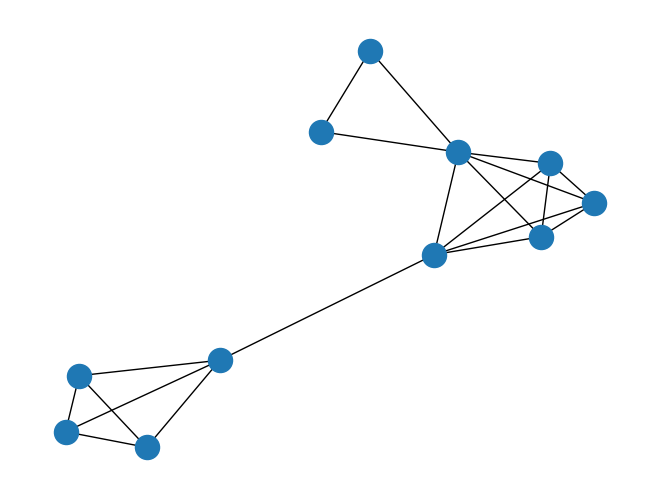

In [46]:
G1 = nx.complete_graph(4)
G1 = nx.relabel_nodes(G1, mapping={0:5, 1:6, 2:7, 3: 8})
G2 = nx.complete_graph(5)
G = nx.union(G1, G2)
G.add_edges_from([(0,5), (1, 9), (9,10), (10,1)])
nx.draw(G)


In [48]:
llyCurv = lly_curvature(G, double_edges=False)
steinerbergerCurv = steinerbergerCurvature(G)
edges_with_equal_lly_curv = find_keys_with_same_values(llyCurv)

print(llyCurv)
print(edges_with_equal_lly_curv)
print(steinerbergerCurv)

for edge_list in edges_with_equal_lly_curv:
    for i in range(len(edge_list)):
        for j in range(i+1, len(edge_list)):
            if (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][0]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][1]],3)):
                print("Passt")
            elif (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][1]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][0]],3)):
                print("Passt")
            else:
                print("Passt it")

{(5, 6): 0.833, (5, 7): 0.833, (5, 8): 0.833, (5, 0): -1.1, (6, 7): 1.333, (6, 8): 1.333, (7, 8): 1.333, (0, 1): 0.333, (0, 2): 0.85, (0, 3): 0.85, (0, 4): 0.85, (1, 2): 0.583, (1, 3): 0.583, (1, 4): 0.583, (1, 9): 0.167, (1, 10): 0.167, (2, 3): 1.25, (2, 4): 1.25, (3, 4): 1.25, (9, 10): 1.5}
[[(5, 6), (5, 7), (5, 8)], [(6, 7), (6, 8), (7, 8)], [(0, 2), (0, 3), (0, 4)], [(1, 2), (1, 3), (1, 4)], [(1, 9), (1, 10)], [(2, 3), (2, 4), (3, 4)]]
[-1.21472393 -1.88957055  0.80981595  0.80981595  0.80981595 -1.01226994
  1.01226994  1.01226994  1.01226994  1.34969325  1.34969325]
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt
Passt


In [50]:
llyCurv = lly_curvature(G)
steinerbergerCurv = steinerbergerCurvature(G)
avg_steinerberger_curv = []
llyCurvList = []
edges_covered = []
for edge in llyCurv.keys():
    if not edge in edges_covered:
        average_steinerberger_curv = 0.5*(steinerbergerCurv[edge[0]] + steinerbergerCurv[edge[1]])
        avg_steinerberger_curv.append(average_steinerberger_curv)
        llyCurvList.append(llyCurv[edge])
        edges_covered.append((edge[1], edge[0]))

r, p = pearsonr(llyCurvList, avg_steinerberger_curv)
print(r)

0.8151726557342973


## 3.1 Testing on random graphs

On random graphs, we don't get this kind of behaviour.

In [60]:
G=nx.erdos_renyi_graph(n=10, p=0.5)
llyCurv = lly_curvature(G, double_edges=False)
steinerbergerCurv = steinerbergerCurvature(G)
edges_with_equal_lly_curv = find_keys_with_same_values(llyCurv)

print(llyCurv)
print(edges_with_equal_lly_curv)
print(steinerbergerCurv)

for edge_list in edges_with_equal_lly_curv:
    for i in range(len(edge_list)):
        for j in range(i+1, len(edge_list)):
            if (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][0]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][1]],3)):
                print("Passt")
            elif (round(steinerbergerCurv[edge_list[i][0]],3) == round(steinerbergerCurv[edge_list[j][1]],3)) and (round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][0]],3)):
                print("Passt")
            else:
                print("Passt it")
            """    
            if round(steinerbergerCurv[edge_list[i][0]],3) + round(steinerbergerCurv[edge_list[i][1]],3) == round(steinerbergerCurv[edge_list[j][0]],3) + round(steinerbergerCurv[edge_list[j][1]],3):
                print("Passt")
            else:
                print("Passt it")"""

{(0, 3): 0.667, (0, 5): 0.583, (0, 7): 0.5, (0, 8): 0.75, (1, 2): 0.8, (1, 4): 0.55, (1, 5): 0.333, (1, 6): 0.633, (1, 9): 0.95, (2, 3): 0.367, (2, 5): 0.733, (2, 8): 0.55, (2, 9): 0.55, (3, 4): 0.5, (3, 5): 0.667, (3, 6): 0.667, (3, 7): 0.75, (4, 7): 0.5, (4, 9): 0.75, (5, 6): 0.833, (5, 8): 0.833, (6, 7): 0.5, (6, 8): 0.5, (6, 9): 0.5}
[[(0, 3), (3, 5), (3, 6)], [(0, 7), (3, 4), (4, 7), (6, 7), (6, 8), (6, 9)], [(0, 8), (3, 7), (4, 9)], [(1, 4), (2, 8), (2, 9)], [(5, 6), (5, 8)]]
[ 1.66666667e+00 -1.77635684e-15  2.66453526e-15  0.00000000e+00
  1.66666667e+00 -7.10542736e-15  1.77635684e-15  0.00000000e+00
  1.66666667e+00  1.66666667e+00]
Passt it
Passt it
Passt
Passt
Passt
Passt it
Passt
Passt
Passt
Passt it
Passt
Passt
Passt it
Passt
Passt
Passt it
Passt it
Passt
Passt it
Passt
Passt it
Passt
Passt
Passt
Passt it
